See the README.md file in the project folder for more details about this project, including the business case and primary question for the analysis. Criteria selection for the GBD Results Tool is also located in the README.

In [ ]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Import the dataset and view the info and head of the data
gbd = pd.read_csv('IHME-GBD_2021_DATA-b411c487-1.csv')
gbd.info()
gbd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330480 entries, 0 to 330479
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     330480 non-null  int64  
 1   measure_name   330480 non-null  object 
 2   location_id    330480 non-null  int64  
 3   location_name  330480 non-null  object 
 4   sex_id         330480 non-null  int64  
 5   sex_name       330480 non-null  object 
 6   age_id         330480 non-null  int64  
 7   age_name       330480 non-null  object 
 8   cause_id       330480 non-null  int64  
 9   cause_name     330480 non-null  object 
 10  metric_id      330480 non-null  int64  
 11  metric_name    330480 non-null  object 
 12  year           330480 non-null  int64  
 13  val            330480 non-null  float64
 14  upper          330480 non-null  float64
 15  lower          330480 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 40.3+ MB


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,1,Number,2013,10589.331043,11468.867301,9438.654286
1,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,1,Number,2013,9320.401070,10434.169420,7542.508086
2,1,Deaths,81,Germany,3,Both,22,All ages,322,Lower respiratory infections,1,Number,2013,19909.732113,21708.585516,17103.527461
3,1,Deaths,81,Germany,1,Male,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.024968,0.027020,0.022325
4,1,Deaths,81,Germany,2,Female,22,All ages,322,Lower respiratory infections,2,Percent,2013,0.020368,0.022754,0.016486


In [3]:
# Basic stats for the dataset
gbd.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,330480.000000,330480.000000,330480.000000,330480.00000,330480.000000,330480.000000,330480.000000,3.304800e+05,3.304800e+05,3.304800e+05
mean,4.029412,70.851852,2.000000,173.00000,665.823529,2.000000,2016.500000,2.107100e+05,2.442471e+05,1.817524e+05
std,2.134941,16.358744,0.816498,97.94401,291.141347,0.816498,2.872286,2.698877e+06,3.067813e+06,2.377335e+06
min,1.000000,45.000000,1.000000,22.00000,297.000000,1.000000,2012.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,54.000000,1.000000,124.00000,328.000000,1.000000,2014.000000,1.390339e-03,1.836781e-03,9.357030e-04
50%,5.000000,77.000000,2.000000,193.00000,515.000000,2.000000,2016.500000,4.286751e-01,5.427561e-01,3.230553e-01
75%,6.000000,86.000000,3.000000,242.00000,947.000000,3.000000,2019.000000,3.487790e+02,4.093847e+02,2.940222e+02
max,6.000000,93.000000,3.000000,284.00000,1048.000000,3.000000,2021.000000,1.585205e+08,1.755399e+08,1.434200e+08


In [4]:
# Count NAs in dataset
gbd.isna().sum()

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

Data appears mostly clean with no obvious missing data. Variable IDs (e.g., measure_id, location_id, etc.) were included by mistake. Remove since columns already exist with correct labels for each of these IDs. Will also change 'object' data types to 'category'. Consider dropping "_name" from column labels?

In [5]:
# Remove ID columns
drop_columns = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id']

gbd = gbd.drop(
    labels = drop_columns,
    axis = 1
)

gbd

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Deaths,Germany,Male,All ages,Lower respiratory infections,Number,2013,10589.331043,11468.867301,9438.654286
1,Deaths,Germany,Female,All ages,Lower respiratory infections,Number,2013,9320.401070,10434.169420,7542.508086
2,Deaths,Germany,Both,All ages,Lower respiratory infections,Number,2013,19909.732113,21708.585516,17103.527461
3,Deaths,Germany,Male,All ages,Lower respiratory infections,Percent,2013,0.024968,0.027020,0.022325
4,Deaths,Germany,Female,All ages,Lower respiratory infections,Percent,2013,0.020368,0.022754,0.016486
...,...,...,...,...,...,...,...,...,...,...
330475,Incidence,Spain,Female,20-54 years,Asthma,Percent,2021,0.000490,0.000671,0.000353
330476,Incidence,Spain,Both,20-54 years,Asthma,Percent,2021,0.000433,0.000586,0.000311
330477,Incidence,Spain,Male,20-54 years,Asthma,Rate,2021,123.584280,163.491555,86.549419
330478,Incidence,Spain,Female,20-54 years,Asthma,Rate,2021,213.068617,286.626852,155.875266


In [51]:
# Remove _name from column labels
col_names = {'measure_name': 'measure',
             'location_name': 'location',
             'sex_name': 'sex',
             'age_name': 'age',
             'cause_name': 'cause',
             'metric_name': 'metric'}

gbd.rename(columns=col_names,
           inplace=True)

display(gbd)

,measure,location,sex,age,cause,metric,year,val,upper,lower,missing
0,Deaths,Germany,Male,All ages,Lower respiratory infections,Number,2013,10589.331043,11468.867301,9438.654286,False
1,Deaths,Germany,Female,All ages,Lower respiratory infections,Number,2013,9320.401070,10434.169420,7542.508086,False
2,Deaths,Germany,Both,All ages,Lower respiratory infections,Number,2013,19909.732113,21708.585516,17103.527461,False
3,Deaths,Germany,Male,All ages,Lower respiratory infections,Percent,2013,0.024968,0.027020,0.022325,False
4,Deaths,Germany,Female,All ages,Lower respiratory infections,Percent,2013,0.020368,0.022754,0.016486,False
...,...,...,...,...,...,...,...,...,...,...,...
330475,Incidence,Spain,Female,20-54 years,Asthma,Percent,2021,0.000490,0.000671,0.000353,False
330476,Incidence,Spain,Both,20-54 years,Asthma,Percent,2021,0.000433,0.000586,0.000311,False
330477,Incidence,Spain,Male,20-54 years,Asthma,Rate,2021,123.584280,163.491555,86.549419,False
330478,Incidence,Spain,Female,20-54 years,Asthma,Rate,2021,213.068617,286.626852,155.875266,False


In [6]:
# Change object data types to category
gbd[['measure_name', 'location_name', 'sex_name', 'age_name', 'cause_name', 'metric_name']] = gbd[['measure_name', 'location_name', 'sex_name', 'age_name', 'cause_name', 'metric_name']].astype('category')
gbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330480 entries, 0 to 330479
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   measure_name   330480 non-null  category
 1   location_name  330480 non-null  category
 2   sex_name       330480 non-null  category
 3   age_name       330480 non-null  category
 4   cause_name     330480 non-null  category
 5   metric_name    330480 non-null  category
 6   year           330480 non-null  int64   
 7   val            330480 non-null  float64 
 8   upper          330480 non-null  float64 
 9   lower          330480 non-null  float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 12.0 MB


Data is clean and ready for visualisation/EDA.

In [7]:
# Count the values of the categorical columns
gbd[['measure_name', 'location_name', 'sex_name', 'age_name', 'cause_name', 'metric_name']].apply(pd.Series.value_counts)

,measure_name,location_name,sex_name,age_name,cause_name,metric_name
20-54 years,NaN,NaN,NaN,82620.0,NaN,NaN
55+ years,NaN,NaN,NaN,82620.0,NaN,NaN
<20 years,NaN,NaN,NaN,82620.0,NaN,NaN
All ages,NaN,NaN,NaN,82620.0,NaN,NaN
Asthma,NaN,NaN,NaN,NaN,29160.0,NaN
Austria,NaN,12240.0,NaN,NaN,NaN,NaN
Belgium,NaN,12240.0,NaN,NaN,NaN,NaN
Both,NaN,NaN,110160.0,NaN,NaN,NaN
Bulgaria,NaN,12240.0,NaN,NaN,NaN,NaN
COVID-19,NaN,NaN,NaN,NaN,29160.0,NaN


Measures (prevalence, incidence, deaths) do not contain same number of values. Need to take a closer look at this.

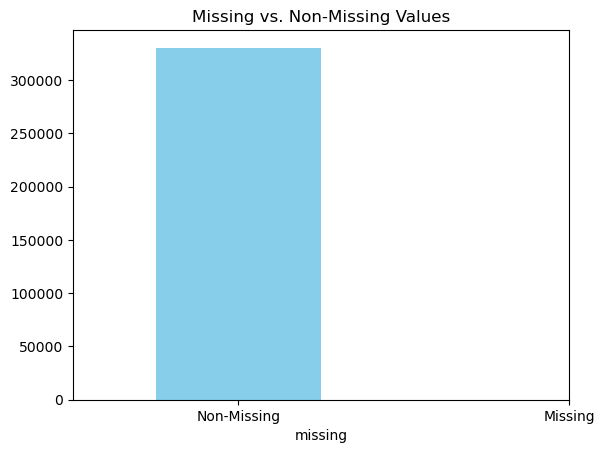

In [8]:
# Visualise measure counts
import matplotlib.pyplot as plt

# Define custom missing indicators
missing_indicators = ['?', 'NA', 'N/A', 'unknown', '', ' ']

# Create a binary mask: 1 for missing (custom or NaN), 0 otherwise
gbd['missing'] = gbd['measure_name'].isna() | gbd['measure_name'].isin(missing_indicators)

# Plot missing vs. non-missing
gbd['missing'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Missing vs. Non-Missing Values')
plt.xticks([0, 1], ['Non-Missing', 'Missing'], rotation=0)
plt.show()

The problem likely exists in other variables (respiratory-related cause of death, metric, age group, location, etc.). Will do a more detailed and aggregated analysis to determine the root cause.

In [44]:
# Total entries per country
country_counts = gbd.groupby('location', observed=False).size().reset_index(name='total_entries')
print(country_counts)

       location  total_entries
0       Austria          12240
1       Belgium          12240
2      Bulgaria          12240
3       Croatia          12240
4        Cyprus          12240
5       Czechia          12240
6       Denmark          12240
7       Estonia          12240
8       Finland          12240
9        France          12240
10      Germany          12240
11       Greece          12240
12      Hungary          12240
13      Ireland          12240
14        Italy          12240
15       Latvia          12240
16    Lithuania          12240
17   Luxembourg          12240
18        Malta          12240
19  Netherlands          12240
20       Poland          12240
21     Portugal          12240
22      Romania          12240
23     Slovakia          12240
24     Slovenia          12240
25        Spain          12240
26       Sweden          12240


In [45]:
# Yearly distribution by country
country_year_counts = (
    gbd.groupby(['location', 'year'], observed=False)
    .size()
    .reset_index(name='entries_per_year')
    .pivot(index='location', columns='year', values='entries_per_year')
    .fillna(0)
)
print(country_year_counts)

year         2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
location                                                               
Austria      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Belgium      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Bulgaria     1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Croatia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Cyprus       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Czechia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Denmark      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Estonia      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Finland      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
France       1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Germany      1224  1224  1224  1224  1224  1224  1224  1224  1224  1224
Greece       1224  1224  1224  1224  1224  1224  1224  1224  122

In [46]:
# Cause per country
country_cause_counts = (
    gbd.groupby(['location', 'cause'], observed=False)
    .size()
    .reset_index(name='entries_per_cause')
)

# Pivot for better visualization
cause_pivot = country_cause_counts.pivot(
    index='location',
    columns='cause',
    values='entries_per_cause'
).fillna(0)
print(cause_pivot)

cause        Asthma  COVID-19  Chronic obstructive pulmonary disease  \
location                                                               
Austria        1080      1080                                   1080   
Belgium        1080      1080                                   1080   
Bulgaria       1080      1080                                   1080   
Croatia        1080      1080                                   1080   
Cyprus         1080      1080                                   1080   
Czechia        1080      1080                                   1080   
Denmark        1080      1080                                   1080   
Estonia        1080      1080                                   1080   
Finland        1080      1080                                   1080   
France         1080      1080                                   1080   
Germany        1080      1080                                   1080   
Greece         1080      1080                                   

The number of 'Latent tuberculosis infection' per country is 360. Looking back at the counts of the categorical columns, the difference between Prevalence and Incidence/Deaths is 9720. The number of 'Latent tuberculosis infection' is 9720. This appears to be the discrepancy. The difference between 'Latent tuberculosis infection' and other causes is 720. Are there 2 missing metrics?

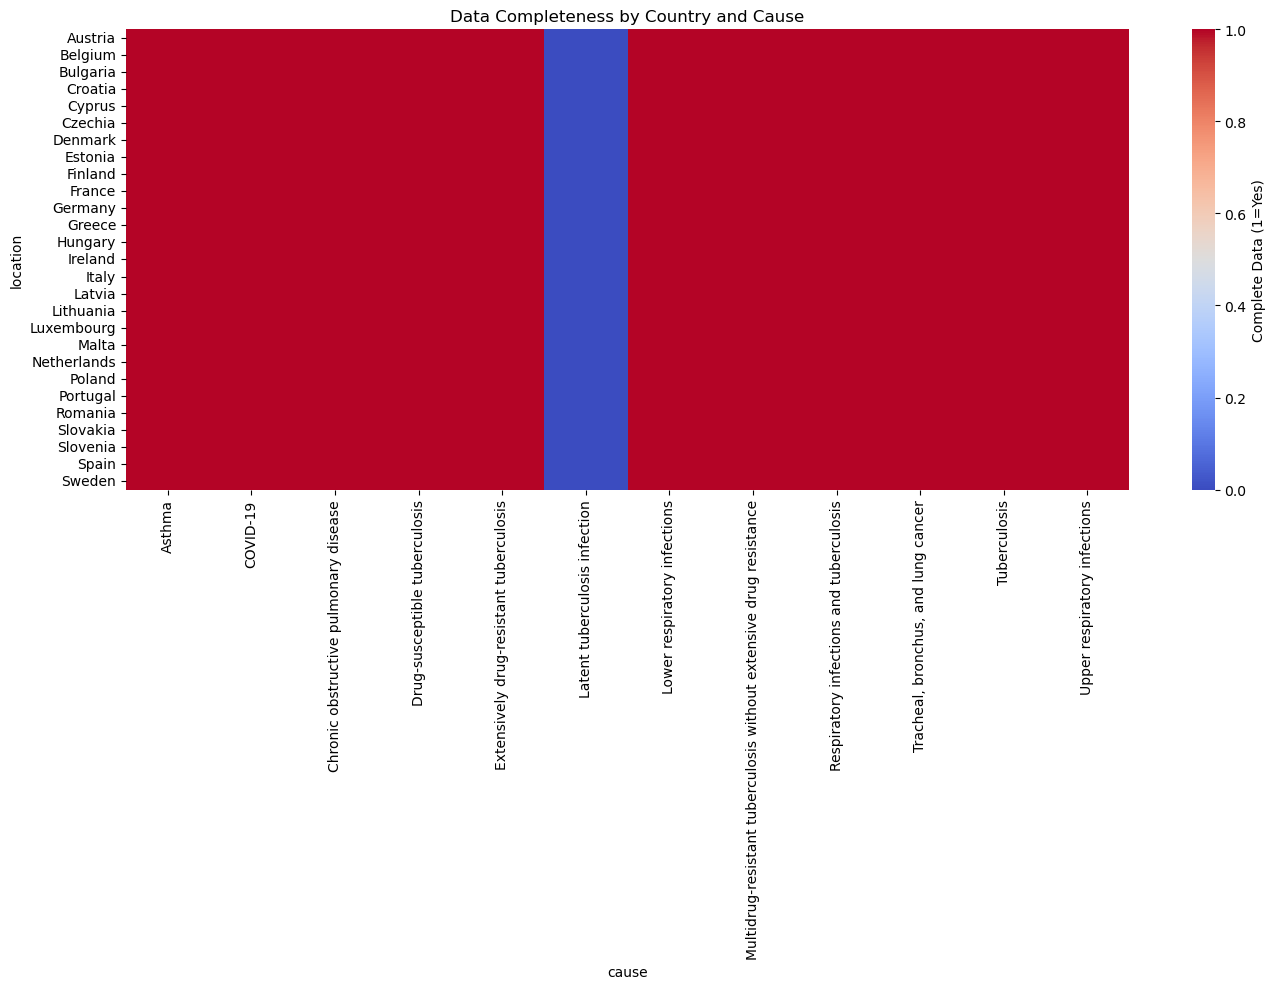

In [48]:
# Visualization for a closer look at Latent tuberculosis infection
# Prepare coverage data
coverage_data = gbd.groupby(['location', 'cause'], observed=False).size().unstack().fillna(0)
plt.figure(figsize=(14, 10))

# Heatmap of entries per country/cause
sns.heatmap(
    coverage_data.map(lambda x: 1 if x >= 1080 else 0),  # 1080 = complete entry
    cmap='coolwarm',
    cbar_kws={'label': 'Complete Data (1=Yes)'}
)
plt.title('Data Completeness by Country and Cause')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visual confirmation that latent tuberculosis infection is the only problematic cause

In [49]:
# Entry counts per metric and sex
ltbi_counts = (
    gbd[gbd['cause'] == 'Latent tuberculosis infection']
    .groupby('location', observed=False)
    .size()
    .reset_index(name='entries')
)

print(f"Total entries for LTBI: {ltbi_counts['entries'].sum()}")
print(f"Countries reporting LTBI: {len(ltbi_counts)}")
print("\nCountries with incomplete LTBI data:")
print(ltbi_counts[ltbi_counts['entries'] < 9])  # 3 metrics * 3 sexes = 9 entries per country/year

Total entries for LTBI: 9720
Countries reporting LTBI: 27

Countries with incomplete LTBI data:
Empty DataFrame
Columns: [location, entries]
Index: []


In [50]:
# Check completeness across dimensions
def check_completeness(df, cause):
    cause_df = df[df['cause'] == cause]
    
    # Check metric coverage
    metric_coverage = cause_df.groupby('location', observed=False)['metric'].nunique()
    missing_metrics = metric_coverage[metric_coverage < 3].index
    
    # Check sex coverage
    sex_coverage = cause_df.groupby('location', observed=False)['sex'].nunique()
    missing_sex = sex_coverage[sex_coverage < 3].index
    
    return {
        'total_countries': cause_df['location'].nunique(),
        'missing_metrics': list(missing_metrics),
        'missing_sex': list(missing_sex)
    }

ltbi_report = check_completeness(gbd, 'Latent tuberculosis infection')
print(ltbi_report)

{'total_countries': 27, 'missing_metrics': [], 'missing_sex': []}
